# GUC Clustering Project 

**Objective:** 
The objective of this project teach students how to apply clustering to real data sets

The projects aims to teach student: 
* Which clustering approach to use
* Compare between Kmeans, Hierarchal, DBScan, and Gaussian Mixtures  
* How to tune the parameters of each data approach
* What is the effect of different distance functions (optional) 
* How to evaluate clustering approachs 
* How to display the output
* What is the effect of normalizing the data 

Students in this project will use ready-made functions from Sklearn, plotnine, numpy and pandas 
 



In [1]:
# if plotnine is not installed in Jupter then use the following command to install it 


Running this project require the following imports 

In [2]:
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn.preprocessing as prep
from sklearn.datasets import make_blobs
#from plotnine import *   
# StandardScaler is a function to normalize the data 
# You may also check MinMaxScaler and MaxAbsScaler 
#from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors

from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris
from scipy.spatial.distance import cdist
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.datasets import make_blobs
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn import mixture
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA







from sklearn.decomposition import PCA

from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

from sklearn.metrics import silhouette_score

%matplotlib inline

In [3]:
# helper function that allows us to display data in 2 dimensions an highlights the clusters
def display_cluster(X,km=[],num_clusters=0):
    color = 'brgcmyk'  #List colors
    alpha = 0.5  #color obaque
    s = 20
    if num_clusters == 0:
        plt.scatter(X[:,0],X[:,1],c = color[0],alpha = alpha,s = s)
    else:
        for i in range(num_clusters):
            plt.scatter(X[km.labels_==i,0],X[km.labels_==i,1],c = color[i],alpha = alpha,s=s)
            plt.scatter(km.cluster_centers_[i][0],km.cluster_centers_[i][1],c = color[i], marker = 'x', s = 100)

## Multi Blob Data Set 
* The Data Set generated below has 6 cluster with varying number of users and varing densities
* Cluster the data set below using 



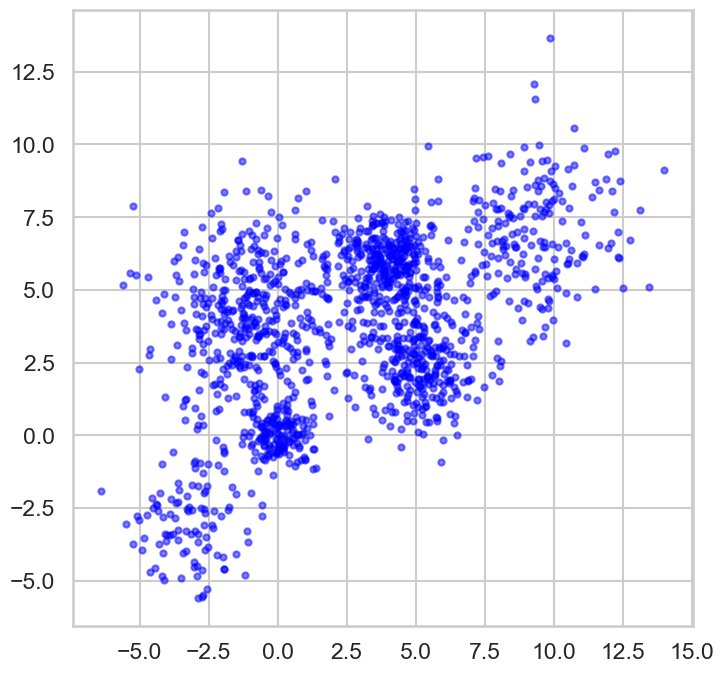

In [4]:
plt.rcParams['figure.figsize'] = [8,8]
sns.set_style("whitegrid")
sns.set_context("talk")

n_bins = 6  
centers = [(-3, -3), (0, 0), (5,2.5),(-1, 4), (4, 6), (9,7)]
Multi_blob_Data, y = make_blobs(n_samples=[100,150, 300, 400,300, 200], n_features=2, cluster_std=[1.3,0.6, 1.2, 1.7,0.9,1.7],
                  centers=centers, shuffle=False, random_state=42)
display_cluster(Multi_blob_Data)

### Kmeans 
* Use Kmeans with different values of K to cluster the above data 
* Display the outcome of each value of K 
* Plot distortion function versus K and choose the approriate value of k 
* Plot the silhouette_score versus K and use it to choose the best K 
* Store the silhouette_score for the best K for later comparison with other clustering techniques. 

In [5]:
Multi_blob_df = pd.DataFrame(Multi_blob_Data, columns=['col_1' , 'col_2'])
Multi_blob_df

,col_1,col_2
0,-2.354272,-3.179744
1,-2.158005,-1.020061
2,-3.304399,-3.304378
3,-0.947023,-2.002335
4,-3.610317,-2.294672
...,...,...
1445,9.240137,3.378037
1446,10.305952,7.366174
1447,9.864057,13.674604
1448,5.457008,9.931984


In [6]:
scaler = MinMaxScaler()
Multi_blob_scaled = scaler.fit_transform(Multi_blob_Data)
Multi_blob_scaled = pd.DataFrame(Multi_blob_scaled , columns=['col_1' , 'col_2'])
Multi_blob_scaled


,col_1,col_2
0,0.198412,0.124833
1,0.208024,0.236975
2,0.151881,0.118362
3,0.267330,0.185971
4,0.136899,0.170791
...,...,...
1445,0.766233,0.465348
1446,0.818430,0.672433
1447,0.796788,1.000000
1448,0.580959,0.805663


using minimum maximum scaling to scale data

In [7]:

def get_labels_kmeans (k , data):
    kmeans_labels_df = pd.DataFrame()
    K =range(1,k+1)

    for i in K:
        kmeans = KMeans(n_clusters= i, random_state=0, n_init=10).fit(data)
        label = kmeans.labels_
        kmeans_labels_df [ f'k={i}'] = label.tolist()


    return kmeans_labels_df



In [8]:
Multi_kmeans_labels = get_labels_kmeans(10 ,Multi_blob_scaled)
Multi_kmeans_labels

,k=1,k=2,k=3,k=4,k=5,k=6,k=7,k=8,k=9,k=10
0,0,1,1,2,3,4,3,4,0,4
1,0,1,1,2,3,4,5,7,4,0
2,0,1,1,2,3,4,3,4,0,4
3,0,1,1,2,3,4,5,7,4,0
4,0,1,1,2,3,4,3,4,0,4
...,...,...,...,...,...,...,...,...,...,...
1445,0,0,0,1,1,3,4,3,3,2
1446,0,0,0,1,1,3,4,5,6,9
1447,0,0,0,1,1,3,4,5,6,9
1448,0,0,0,1,2,1,1,5,6,8


Getting labels of different k and putting them in a data frame for further analysis

In [9]:
def plot_kmeans(df_test , df_labels):
    figure, axis = plt.subplots(2, int(df_labels.columns.size /2 ) )
    # kmeans_labels_df = get_labels_kmeans(10)
    for i in range(0,2):
        for j in range (0,5):
            axis[i,j].scatter(df_test['col_1'] , df_test['col_2'] , c = df_labels[f'k={j+1+5*i}'])


    plt.show()

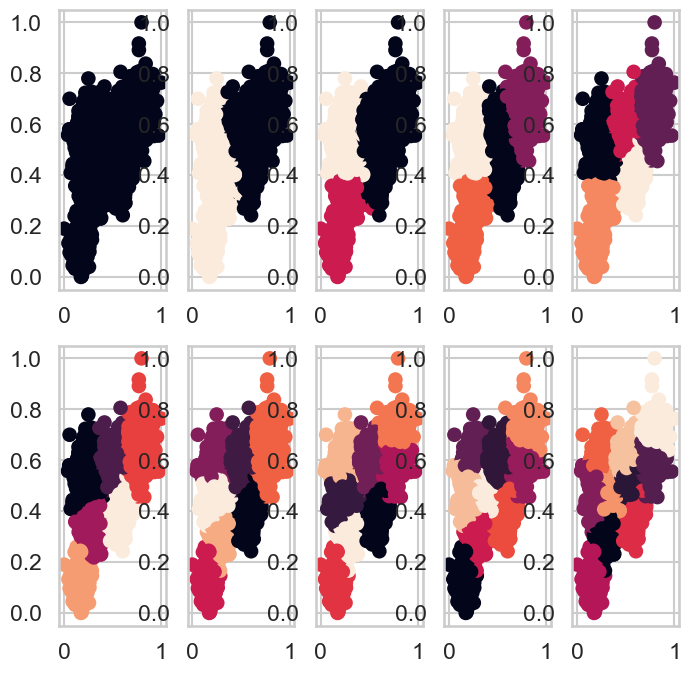

In [10]:

plot_kmeans(Multi_blob_scaled ,Multi_kmeans_labels)

Result of clustering Multi_blob dataset with different k

In [11]:



def plot_distortion_function(data, num):
    distortions=[]
    mapping1 ={}
    
    K = range(1,num+1)

    for k in K:
        # Building and fitting the model
        kmeanModel = KMeans(n_clusters=k).fit(data)
        kmeanModel.fit(data)

        distortions.append(sum(np.min(cdist(data, kmeanModel.cluster_centers_,
                                            'euclidean'), axis=1)) / data.shape[0])
        mapping1[k] = sum(np.min(cdist(data, kmeanModel.cluster_centers_,
                                       'euclidean'), axis=1)) / data.shape[0]

    plt.plot(K, distortions, 'bx-')
    plt.xlabel('Values of K')
    plt.ylabel('Distortion')
    plt.title('The Elbow Method using Distortion')
    plt.show()    

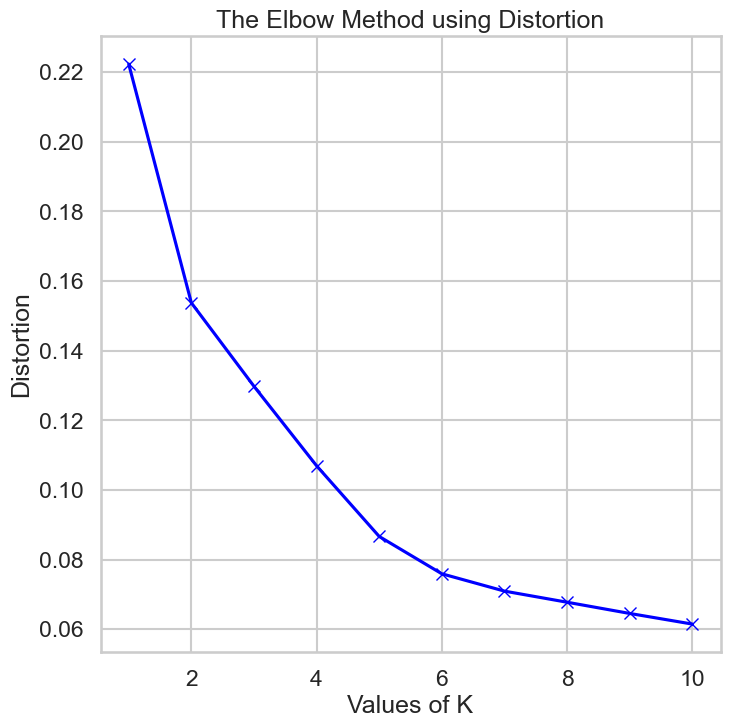

In [12]:
plot_distortion_function(Multi_blob_scaled, 10)

In [13]:
  def plot_silhoutte_average(data , labels) :
        range_n_clusters = [2, 3, 4, 5, 6, 7, 8,9,10]
        silhouette_avg = []
        for num in range_n_clusters:
             silhouette_avg.append(silhouette_score(data, labels[f'k={num}'])) ; 


        plt.plot(range_n_clusters,silhouette_avg,'bx-')
        plt.xlabel('Values of K') 
        plt.ylabel('Silhouette score') 
        plt.title('Silhouette analysis For Optimal k')
        plt.show()
        

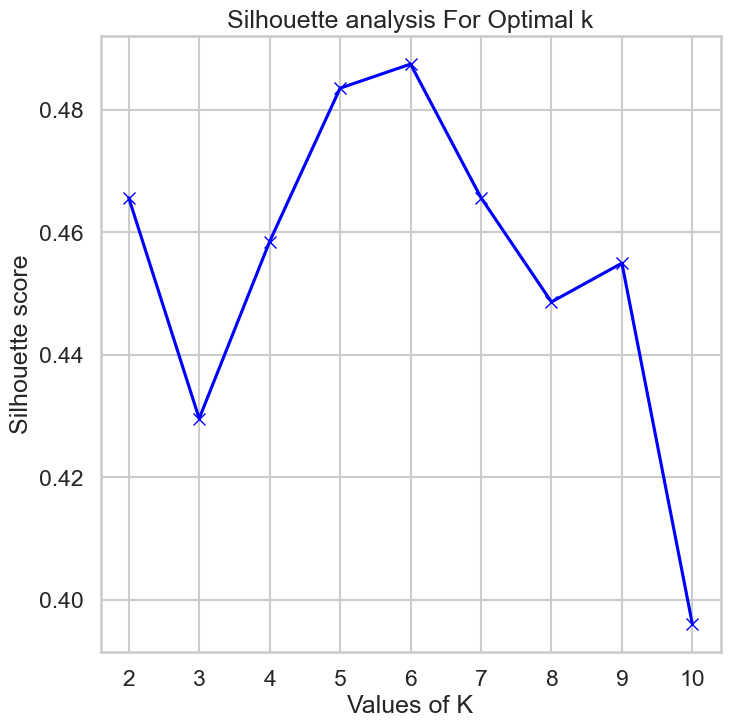

In [14]:
plot_silhoutte_average(Multi_blob_scaled, Multi_kmeans_labels)

In [15]:
silhouette_score(Multi_blob_scaled,Multi_kmeans_labels['k=6'])     

0.48749158260058156

### Best k to be chosen is 6 according to elbow method and silhouette score

### Hierarchal Clustering
* Use AgglomerativeClustering function to  to cluster the above data 
* In the  AgglomerativeClustering change the following parameters 
    * Affinity (use euclidean, manhattan and cosine)
    * Linkage( use average and single )
    * Distance_threshold (try different)
* For each of these trials plot the Dendograph , calculate the silhouette_score and display the resulting clusters  
* Find the set of paramters that would find result in the best silhouette_score and store this score for later comparison with other clustering techniques. 
* Record your observation 

In [16]:

def get_labels_agglomerative(data, distance_threshold):
    agglomerative_labels = pd.DataFrame()
    affinities = ['euclidean', 'cosine' ,'manhattan' ]
    linkages = ['average','single' ]

   

    for i in affinities :
        for j in linkages :
            hierarchical_cluster = AgglomerativeClustering(n_clusters= None, affinity=  i , linkage=  j , distance_threshold=distance_threshold )
            labels2 = hierarchical_cluster.fit_predict(data)
            #print(len(labels2))
            agglomerative_labels [f'{i}_{j}'] = labels2.tolist()
    return agglomerative_labels
        



In [17]:
Multi_agglomerative_labels = get_labels_agglomerative(Multi_blob_scaled,0.25)  
Multi_agglomerative_labels

,euclidean_average,euclidean_single,cosine_average,cosine_single,manhattan_average,manhattan_single
0,2,0,0,0,0,0
1,2,0,0,0,6,0
2,2,0,0,0,0,0
3,2,0,0,0,0,0
4,2,0,0,0,0,0
...,...,...,...,...,...,...
1445,4,0,0,0,7,0
1446,4,0,0,0,7,0
1447,0,0,0,0,4,0
1448,0,0,0,0,8,0


    after many trials, 0.25 was found to be the best distance threshold

In [18]:
def plot_agglomerative(data_df ,labels):
    tmp =int(labels.columns.size/2 )
    figure2, axis2 = plt.subplots(2, tmp ) 
    print(tmp)
    # kmeans_labels_df = get_labels_kmeans(10)
    for i in range(0,2):
        for j in range (0,tmp):
            axis2[i,j].scatter(data_df['col_1'] , data_df['col_2'] , c = labels.iloc[:,j+i*tmp])
    plt.show()


3


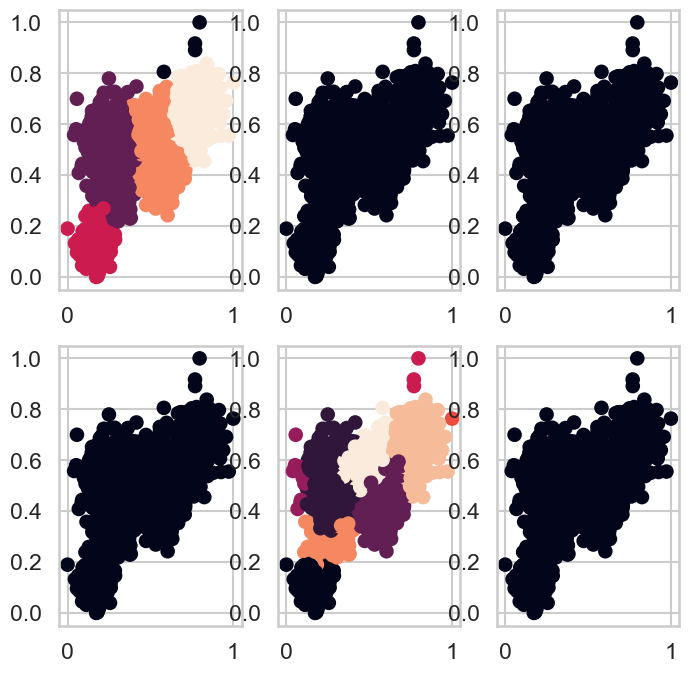

In [19]:
plot_agglomerative(Multi_blob_scaled ,Multi_agglomerative_labels )

In [20]:
linkage_data_frame = pd.DataFrame ()

def get_linkage_df(data) :
    linkage_array =[]
    affinities = ['euclidean', 'cosine' ,'manhattan' ]
    linkages = ['average','single' ]

    for i in affinities :
        for j in linkages :
            if i != 'manhattan':

                linkage_data = linkage(data, method= j, metric= i)
                #hierarchical_cluster = AgglomerativeClustering(n_clusters= None, affinity=  i , linkage=  j , distance_threshold=5 )
                #labels2 = hierarchical_cluster.fit_predict(Multi_blob_Data)
                #print(len(labels2))
                linkage_array.append(linkage_data)
                #linkage_data_frame[f'{i}_{j}'] = linkage_data.tolist()
    return linkage_array



In [21]:
Multi_linkage_array = get_linkage_df(Multi_blob_scaled)
print(len(Multi_linkage_array))

4


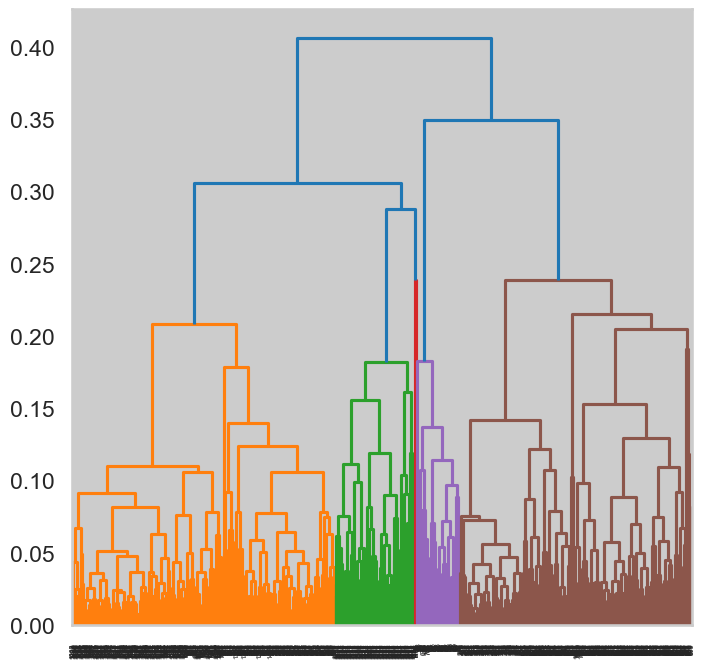

In [22]:
dendrogram(Multi_linkage_array[0])
plt.show()

In [23]:
def get_silhouette_score(data , labels):
    
    silhouette_array = []
    for i in range(0, len(labels.columns)) :
        if labels.iloc[:,i].nunique() >= 2 :

            tmp =silhouette_score(data, labels.iloc[:,i])
            silhouette_array .append([tmp , labels.columns[i]])
        else:
            silhouette_array.append([0 , labels.columns[i]])
    return silhouette_array

In [24]:
get_silhouette_score(Multi_blob_scaled , Multi_agglomerative_labels)

[[0.40589146741900173, 'euclidean_average'],
 [0, 'euclidean_single'],
 [0, 'cosine_average'],
 [0, 'cosine_single'],
 [0.3962686859738286, 'manhattan_average'],
 [0, 'manhattan_single']]

euclidean_average are the optimal parameters for silhouette score

### DBScan
* Use DBScan function to  to cluster the above data 
* In the  DBscan change the following parameters 
    * EPS (from 0.1 to 3)
    * Min_samples (from 5 to 25)
* Plot the silhouette_score versus the variation in the EPS and the min_samples
* Plot the resulting Clusters in this case 
* Find the set of paramters that would find result in the best silhouette_score and store this score for later comparison with other clustering techniques. 
* Record your observations and comments 

In [25]:
def get_labels_DBSCAN(min_eps ,max_eps , min_min_samp , max_min_samp , data):
    
    epsilon_array = np.arange(min_eps , max_eps ,0.1)
    min_samples_array = np.arange( min_min_samp, max_min_samp, 1 )
    DBSCAN_labels  = pd.DataFrame()
    for i in epsilon_array:
        for j in min_samples_array:
            db = DBSCAN(eps=i ,  min_samples=j ).fit(data)
            labels_tmp = db.labels_
            DBSCAN_labels [f'eps={i} , min_samples={j}'] = labels_tmp.tolist()
    return DBSCAN_labels        
        
        
# plt.scatter(df['col_1'], df['col_2'], c=labels3)
# plt.show

In [26]:
Multi_DBSCAN_labels = get_labels_DBSCAN(0.1 , 3.1 ,5,26, Multi_blob_scaled)
Multi_DBSCAN_labels

,"eps=0.1 , min_samples=5","eps=0.1 , min_samples=6","eps=0.1 , min_samples=7","eps=0.1 , min_samples=8","eps=0.1 , min_samples=9","eps=0.1 , min_samples=10","eps=0.1 , min_samples=11","eps=0.1 , min_samples=12","eps=0.1 , min_samples=13","eps=0.1 , min_samples=14",...,"eps=3.0000000000000004 , min_samples=16","eps=3.0000000000000004 , min_samples=17","eps=3.0000000000000004 , min_samples=18","eps=3.0000000000000004 , min_samples=19","eps=3.0000000000000004 , min_samples=20","eps=3.0000000000000004 , min_samples=21","eps=3.0000000000000004 , min_samples=22","eps=3.0000000000000004 , min_samples=23","eps=3.0000000000000004 , min_samples=24","eps=3.0000000000000004 , min_samples=25"
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1445,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1446,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1447,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,0,0,0,0,0,0,0,0,0,0
1448,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
Multi_DBSCAN_array = get_silhouette_score(Multi_blob_scaled,Multi_DBSCAN_labels)
    

In [28]:
DBSCAN_np_array = np.array(Multi_DBSCAN_array)

max_silhouette = max(DBSCAN_np_array[:,0]) 
index_of_max_silhouette = np.argmax(DBSCAN_np_array[:,0])
print (Multi_DBSCAN_array[index_of_max_silhouette])

        

[0.4501563767551942, 'eps=0.1 , min_samples=17']


###  parameters that gets max silhouette score :  epsilon = 0.1 , min samples= 17
        

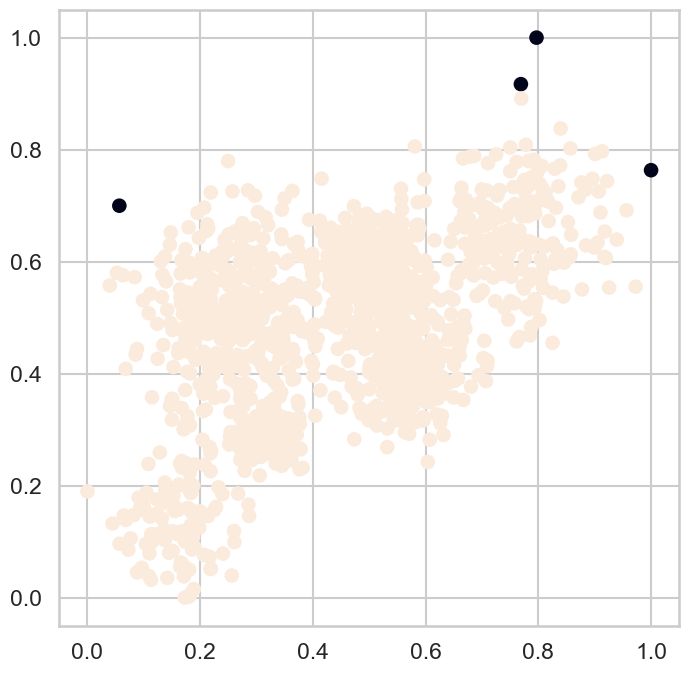

In [29]:
plt.scatter(Multi_blob_scaled['col_1'], Multi_blob_scaled['col_2'], c= Multi_DBSCAN_labels['eps=0.1 , min_samples=17'])
plt.show()

### Gaussian Mixture
* Use GaussianMixture function to cluster the above data 
* In GMM change the covariance_type and check the difference in the resulting proabability fit 
* Use a 2D contour plot to plot the resulting distribution (the components of the GMM) as well as the total Gaussian mixture 

In [30]:
def get_labels_gmm(data):
   

    
    gmm_labels =pd.DataFrame()
    covariance_type = ["full","tied","diag","spherical"]
    results = {}
    for cov in covariance_type:
        gmm =  mixture.GaussianMixture(n_components = 2,covariance_type=cov)
        label = gmm.fit_predict(data)
        gmm_labels[f'{cov}'] = label.tolist()

        if data.columns.size == 2 :
            df1 = pd.DataFrame(data, columns=['col_1' , 'col_2'])
            plt.scatter(df1['col_1'] , df1['col_2'] , c=label)
            plt.show()
    return gmm_labels    



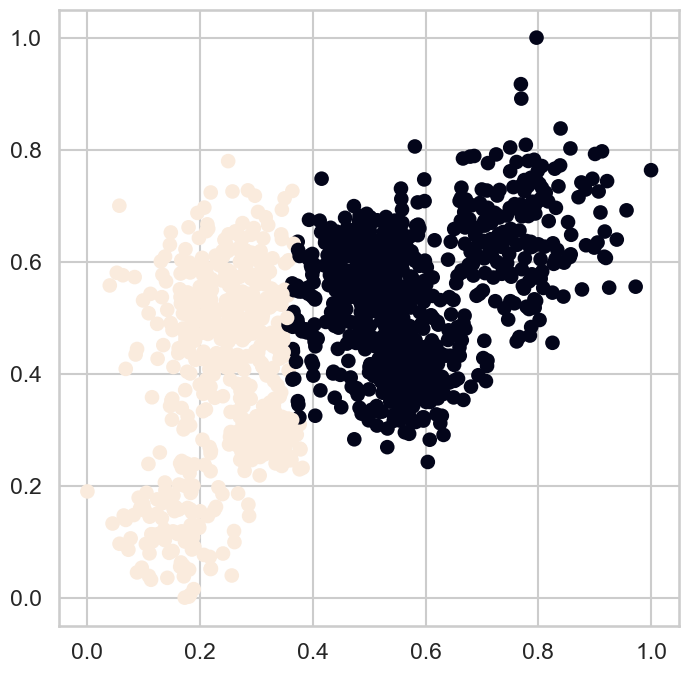

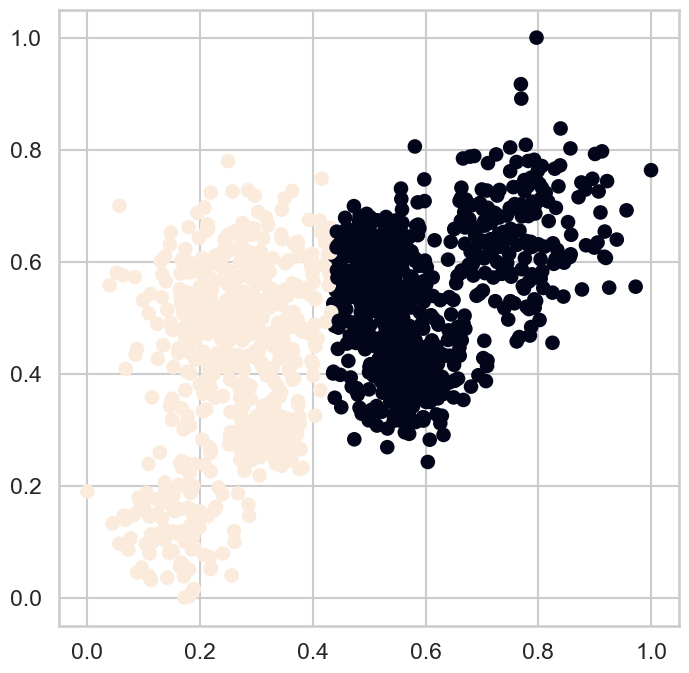

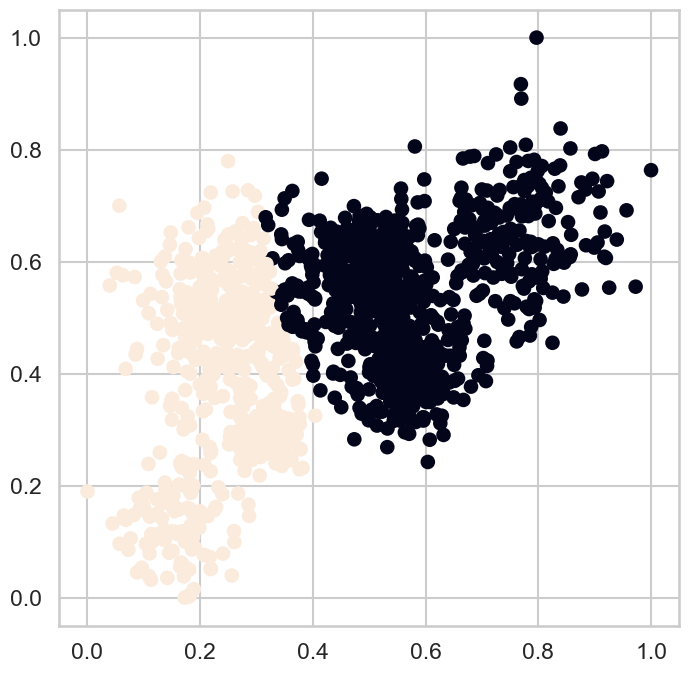

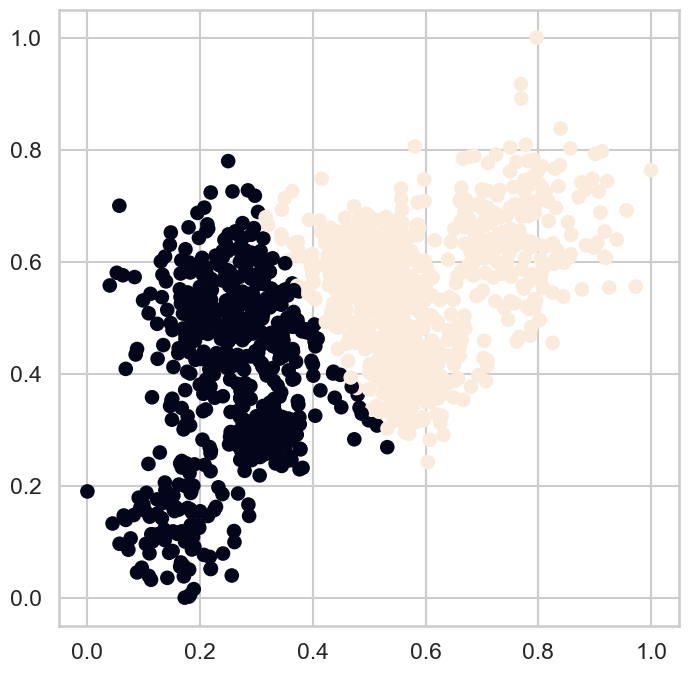

In [31]:
Multi_gmm_labels = get_labels_gmm(Multi_blob_scaled)

In [32]:
Multi_gmm_array = get_silhouette_score(Multi_blob_scaled,Multi_gmm_labels)
Multi_gmm_array




[[0.45744983616217266, 'full'],
 [0.4512978187829303, 'tied'],
 [0.46203042697438157, 'diag'],
 [0.46445432858118174, 'spherical']]

"spherical" gives the highest score

## iris data set 
The iris data set is test data set that is part of the Sklearn module 
which contains 150 records each with 4 features. All the features are represented by real numbers 

The data represents three classes 


In [33]:
from sklearn.datasets import load_iris
iris_data = load_iris(as_frame=True)
# pd.Series(iris_data.target_names).unique()
#array([0, 0, 1])
# list(iris_data.target_names)
# iris_df = pd.DataFrame(iris_data['data'])
# iris_df
# iris_df.info()
iris_df = iris_data.frame
print(iris_df)


     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
..                 ...               ...                ...               ...   
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1               1.8   

     target  
0         0  

In [34]:
pca = PCA(n_components=2)
pca_iris = pca.fit_transform(iris_df)


Applying PCA to reduce parameters to 2 only

In [35]:
iris_scaled = scaler.fit_transform(pca_iris)
iris_scaled = pd.DataFrame(iris_scaled , columns=['col_1' , 'col_2' ])
iris_scaled

,col_1,col_2
0,0.068930,0.596641
1,0.065265,0.422099
2,0.042843,0.425356
3,0.061387,0.368364
4,0.063228,0.596504
...,...,...
145,0.762312,0.535304
146,0.708891,0.327786
147,0.739223,0.492759
148,0.756940,0.502659


In [36]:
iris_kmeans_labels = get_labels_kmeans(10, iris_scaled)
iris_kmeans_labels

,k=1,k=2,k=3,k=4,k=5,k=6,k=7,k=8,k=9,k=10
0,0,0,0,3,1,1,4,0,7,1
1,0,0,0,0,4,4,0,5,0,4
2,0,0,0,0,4,4,0,5,0,4
3,0,0,0,0,4,4,0,5,0,4
4,0,0,0,3,1,1,4,0,7,1
...,...,...,...,...,...,...,...,...,...,...
145,0,1,2,2,3,0,1,6,1,0
146,0,1,1,1,3,0,1,4,6,2
147,0,1,2,2,3,0,1,6,1,0
148,0,1,2,2,3,0,1,6,1,0


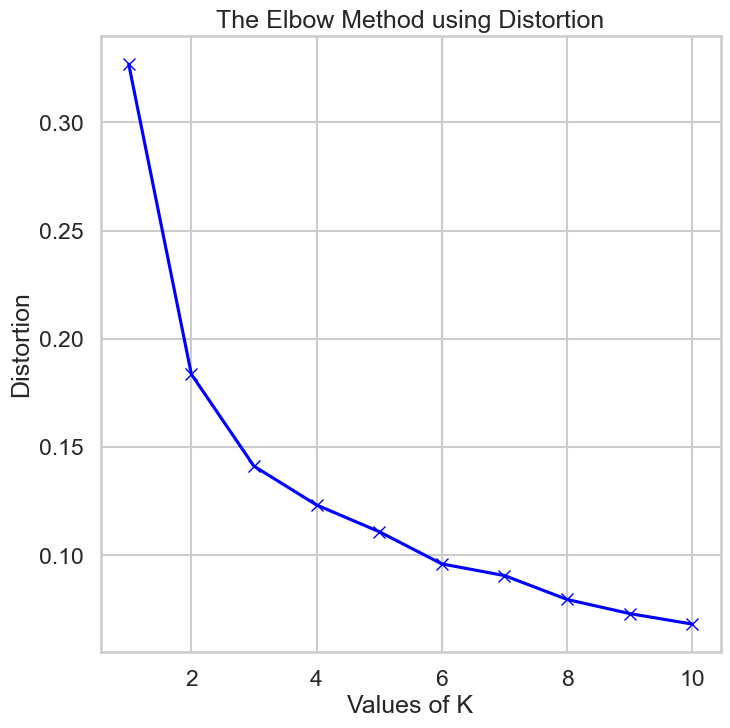

In [37]:
plot_distortion_function(iris_scaled ,10)

In [38]:
get_silhouette_score(iris_scaled , iris_kmeans_labels)

[[0, 'k=1'],
 [0.5911202327859515, 'k=2'],
 [0.5100045367292497, 'k=3'],
 [0.45788099289926093, 'k=4'],
 [0.40356907281612414, 'k=5'],
 [0.4554716488846725, 'k=6'],
 [0.44585724808885935, 'k=7'],
 [0.45540508439852173, 'k=8'],
 [0.4577519436929737, 'k=9'],
 [0.46737084393590284, 'k=10']]

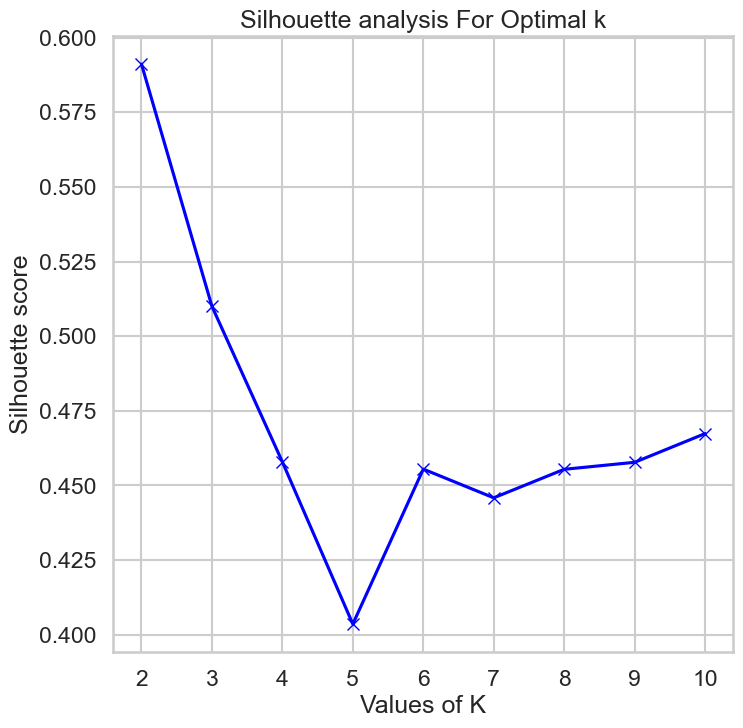

In [39]:
plot_silhoutte_average(iris_scaled , iris_kmeans_labels)

### Highest Silhouette score at k = 2

In [40]:
iris_agglomerative_labels = get_labels_agglomerative (iris_scaled , 0.2)
iris_agglomerative_labels

,euclidean_average,euclidean_single,cosine_average,cosine_single,manhattan_average,manhattan_single
0,2,1,1,0,3,1
1,10,1,1,0,3,1
2,10,1,1,0,3,1
3,10,1,1,0,3,1
4,2,1,1,0,3,1
...,...,...,...,...,...,...
145,3,0,0,0,1,0
146,1,0,0,0,10,0
147,3,0,0,0,1,0
148,3,0,0,0,1,0


3


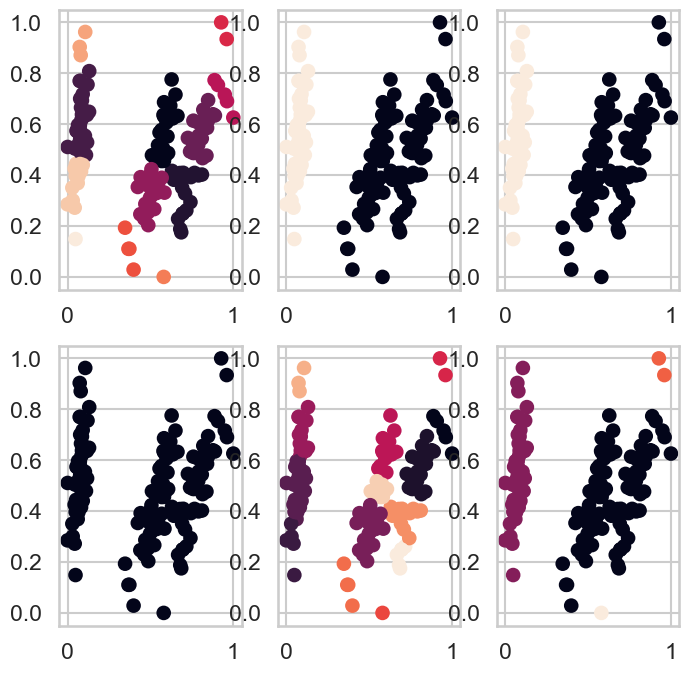

In [41]:
plot_agglomerative(iris_scaled ,iris_agglomerative_labels )

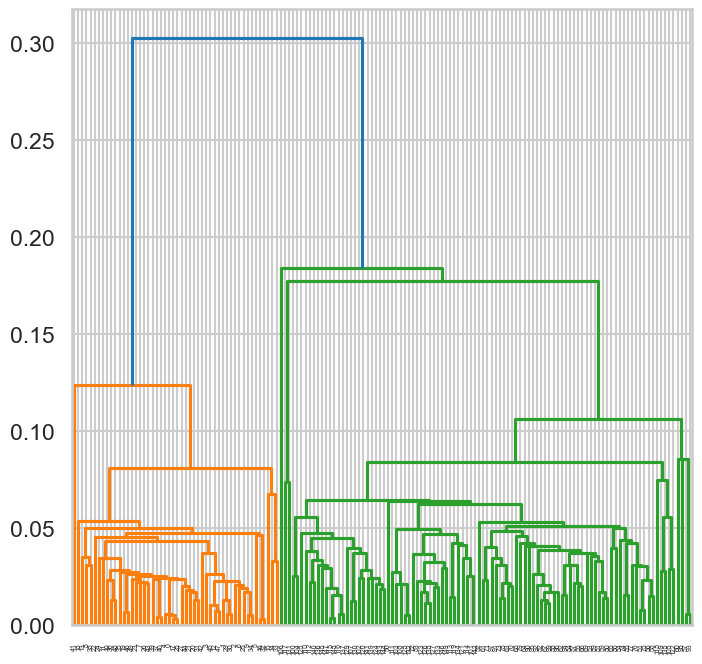

In [42]:
iris_linkage_array = get_linkage_df(iris_scaled)
dendrogram(iris_linkage_array[1])
plt.show()

In [43]:
get_silhouette_score(iris_scaled , iris_agglomerative_labels)

[[0.4330773123114082, 'euclidean_average'],
 [0.5911202327859515, 'euclidean_single'],
 [0.5911202327859515, 'cosine_average'],
 [0, 'cosine_single'],
 [0.42056931437192785, 'manhattan_average'],
 [0.4061528612922785, 'manhattan_single']]

## euclidean_single are the optimal parameters for the highest silhouette score 

In [44]:
iris_DBSCAN_labels = get_labels_DBSCAN(0.1 , 3.1 ,5,26, iris_scaled)
iris_DBSCAN_labels


,"eps=0.1 , min_samples=5","eps=0.1 , min_samples=6","eps=0.1 , min_samples=7","eps=0.1 , min_samples=8","eps=0.1 , min_samples=9","eps=0.1 , min_samples=10","eps=0.1 , min_samples=11","eps=0.1 , min_samples=12","eps=0.1 , min_samples=13","eps=0.1 , min_samples=14",...,"eps=3.0000000000000004 , min_samples=16","eps=3.0000000000000004 , min_samples=17","eps=3.0000000000000004 , min_samples=18","eps=3.0000000000000004 , min_samples=19","eps=3.0000000000000004 , min_samples=20","eps=3.0000000000000004 , min_samples=21","eps=3.0000000000000004 , min_samples=22","eps=3.0000000000000004 , min_samples=23","eps=3.0000000000000004 , min_samples=24","eps=3.0000000000000004 , min_samples=25"
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
146,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
147,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
148,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0


In [45]:
iris_silhouette_array = get_silhouette_score(iris_scaled , iris_DBSCAN_labels)
iris_silhouette_scores = np.array(iris_silhouette_array)[:, 0]
iris_index_of_max_score = np.argmax(iris_silhouette_scores)
iris_silhouette_array[iris_index_of_max_score]


[0.5911202327859515, 'eps=0.30000000000000004 , min_samples=5']

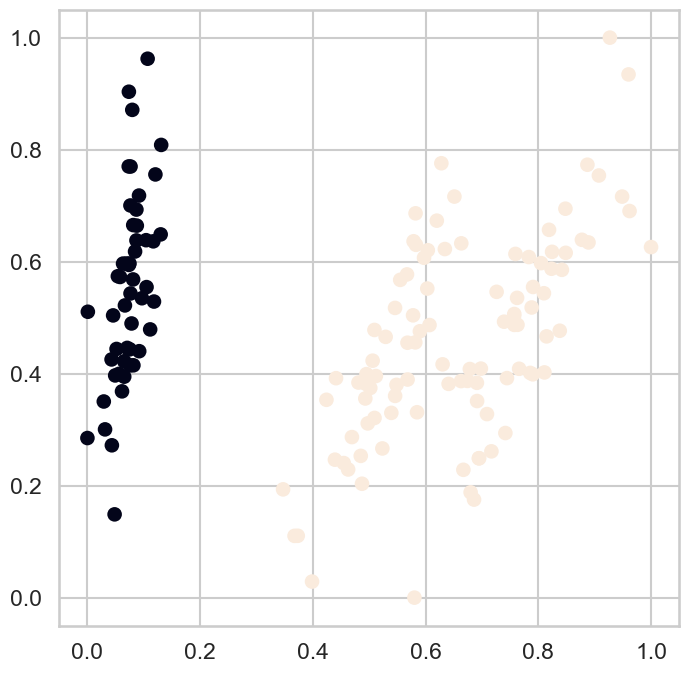

In [46]:
plt.scatter(iris_scaled['col_1'], iris_scaled['col_2'], c= iris_DBSCAN_labels['eps=0.30000000000000004 , min_samples=5'])
plt.show()

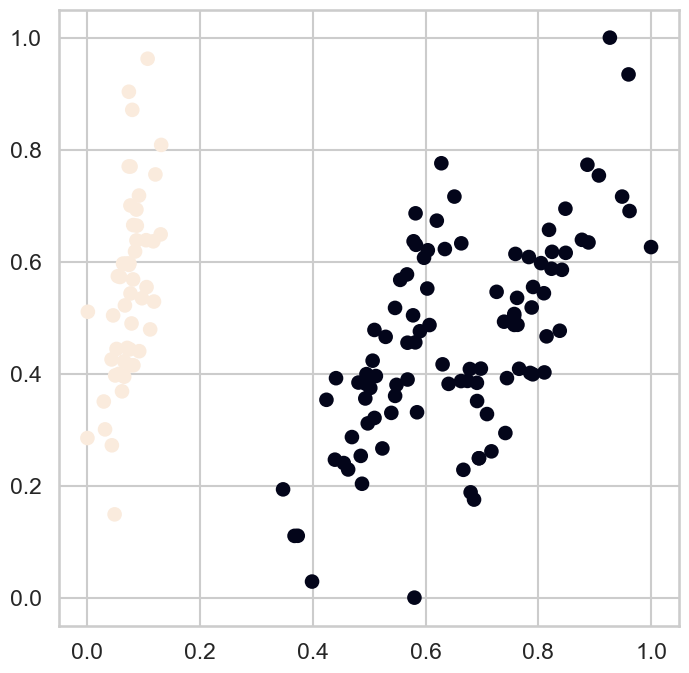

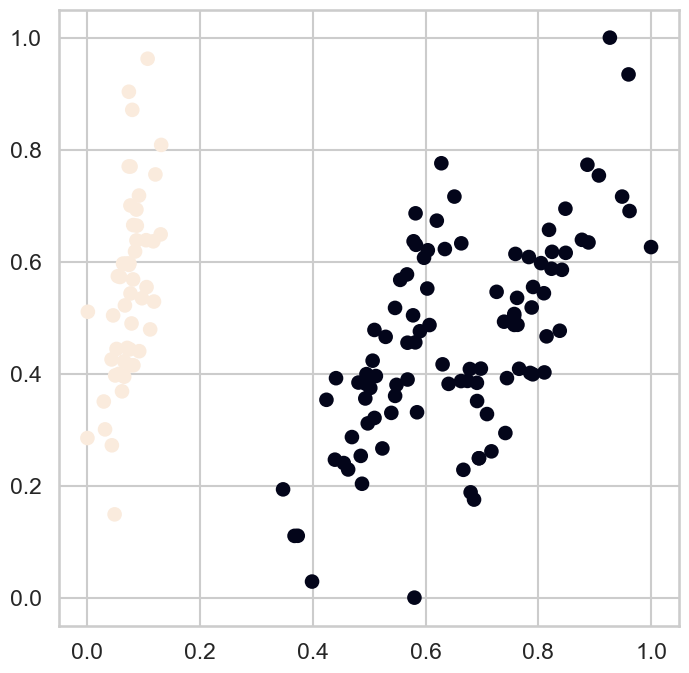

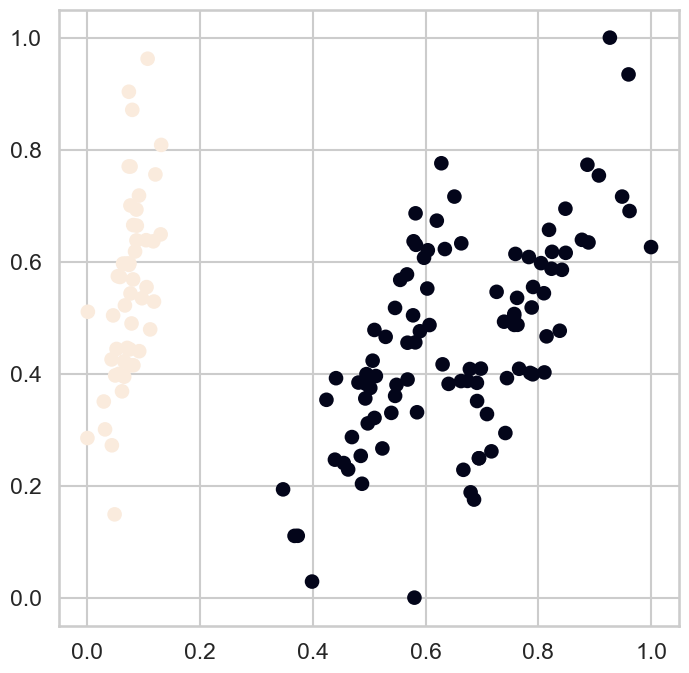

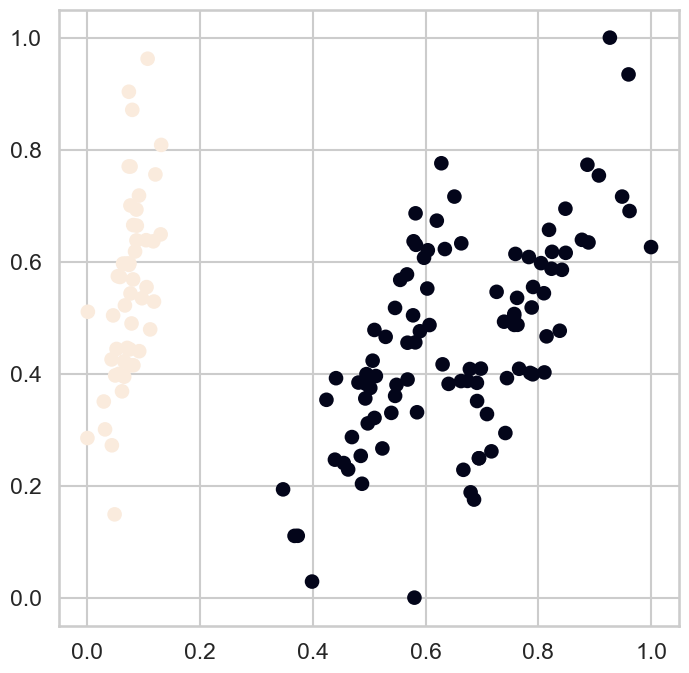

In [47]:
iris_gmm_labels = get_labels_gmm(iris_scaled)

In [48]:
iris_gmm_array = get_silhouette_score(iris_scaled,iris_gmm_labels)
iris_gmm_array


[[0.5911202327859515, 'full'],
 [0.5911202327859515, 'tied'],
 [0.5911202327859515, 'diag'],
 [0.5911202327859515, 'spherical']]

all 4 give the same silhouette score

* Repeat all the above clustering approaches and steps on the above data 
* Normalize the data then repeat all the above steps 
* Compare between the different clustering approaches 

## Customer dataset
Repeat all the above on the customer data set 

In [49]:
import pandas as pd

customer = pd.read_csv("E:/semester 10/Machine learning/assignments/assignment 1/Customer data.csv",index_col="ID")

pca_customer = pca.fit_transform(customer)
customer_temp = scaler.fit_transform(pca_customer)

customer_scaled = pd.DataFrame(customer_temp , columns=[ 'col_1' ,  'col_2' ])
print(customer_scaled)

# customer['Income'] = MaxAbsScaler().fit_transform(customer['Income'].values.reshape(-1, 1))
# customer['Age'] = MaxAbsScaler().fit_transform(customer['Age'].values.reshape(-1, 1))

         col_1     col_2
0     0.324781  0.841454
1     0.420210  0.133408
2     0.195144  0.629508
3     0.496223  0.442218
4     0.413842  0.595745
...        ...       ...
1995  0.320595  0.546518
1996  0.299460  0.258884
1997  0.184871  0.366652
1998  0.227162  0.245244
1999  0.119123  0.305662

[2000 rows x 2 columns]


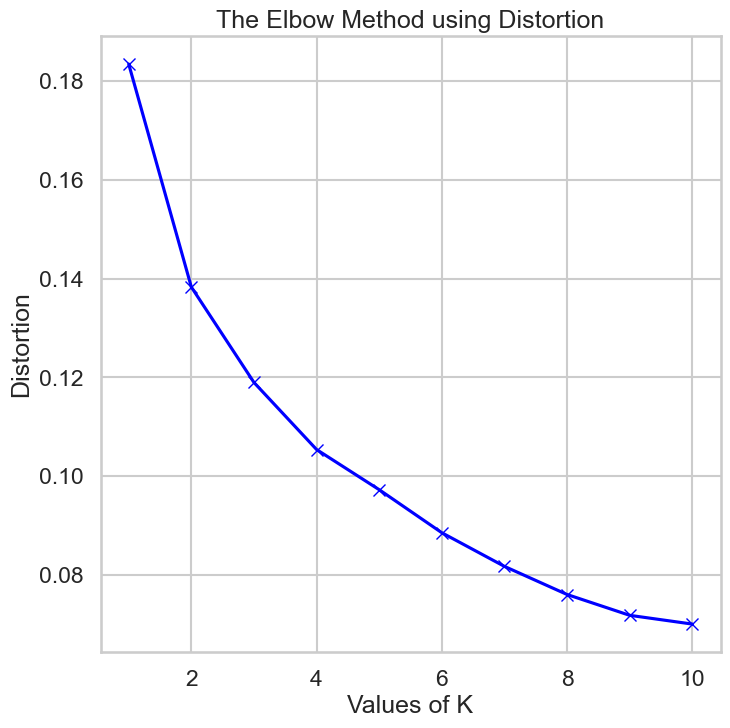

In [50]:
customer_kmeans_labels = get_labels_kmeans(10, customer_scaled)
plot_distortion_function(customer_scaled , 10)

In [51]:
get_silhouette_score(customer_scaled , customer_kmeans_labels)

[[0, 'k=1'],
 [0.4281115923519949, 'k=2'],
 [0.4129075080194309, 'k=3'],
 [0.36120238198428023, 'k=4'],
 [0.338519150155033, 'k=5'],
 [0.3326433796843935, 'k=6'],
 [0.35058131047430585, 'k=7'],
 [0.36460015175476435, 'k=8'],
 [0.3621659082844402, 'k=9'],
 [0.3660597246496863, 'k=10']]

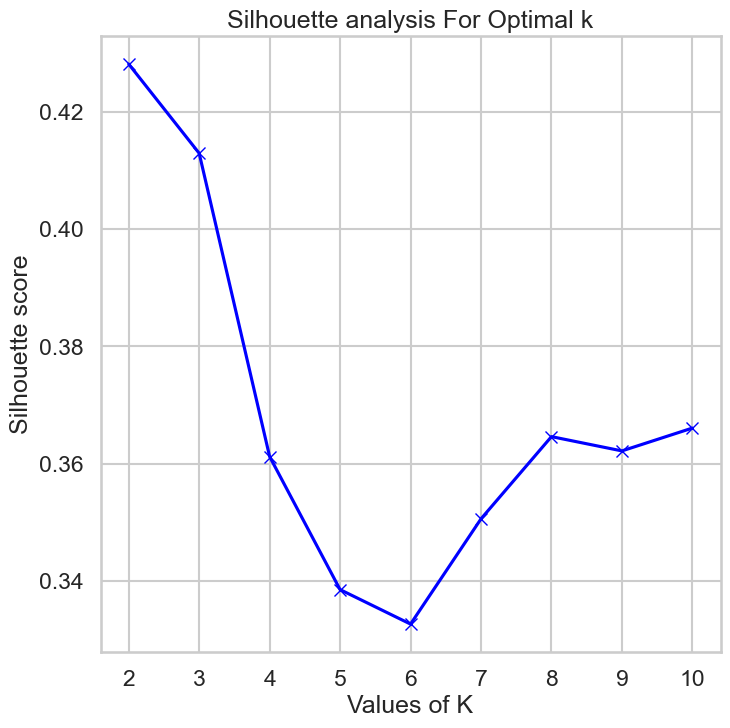

In [52]:
plot_silhoutte_average(customer_scaled , customer_kmeans_labels)

## k= 7 is the optimal k for kmeans clustering

In [53]:
customer_agglomerative_labels = get_labels_agglomerative(customer_scaled , 0.15)
customer_agglomerative_labels

,euclidean_average,euclidean_single,cosine_average,cosine_single,manhattan_average,manhattan_single
0,10,0,0,0,25,0
1,14,0,1,0,0,0
2,7,0,0,0,26,0
3,1,0,0,0,14,0
4,8,0,0,0,15,0
...,...,...,...,...,...,...
1995,12,0,0,0,4,0
1996,13,0,0,0,22,0
1997,6,0,0,0,9,0
1998,13,0,0,0,22,0


3


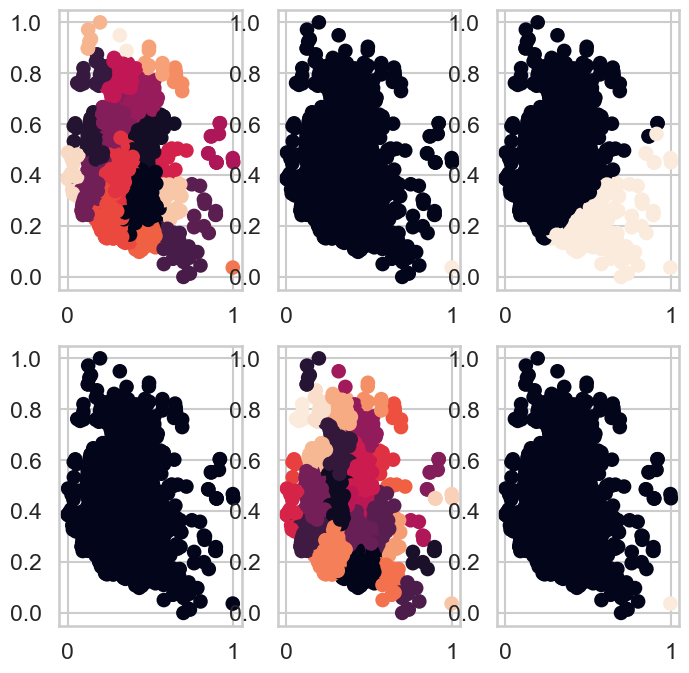

In [54]:
plot_agglomerative(customer_scaled ,customer_agglomerative_labels )

In [55]:
get_silhouette_score(customer_scaled , customer_agglomerative_labels)

[[0.3266842350909949, 'euclidean_average'],
 [0.652020657677669, 'euclidean_single'],
 [0.3333978348049495, 'cosine_average'],
 [0, 'cosine_single'],
 [0.3046160704327368, 'manhattan_average'],
 [0.652020657677669, 'manhattan_single']]

### euclidean_single are the optimal parameters with silhouette score = 0.6403

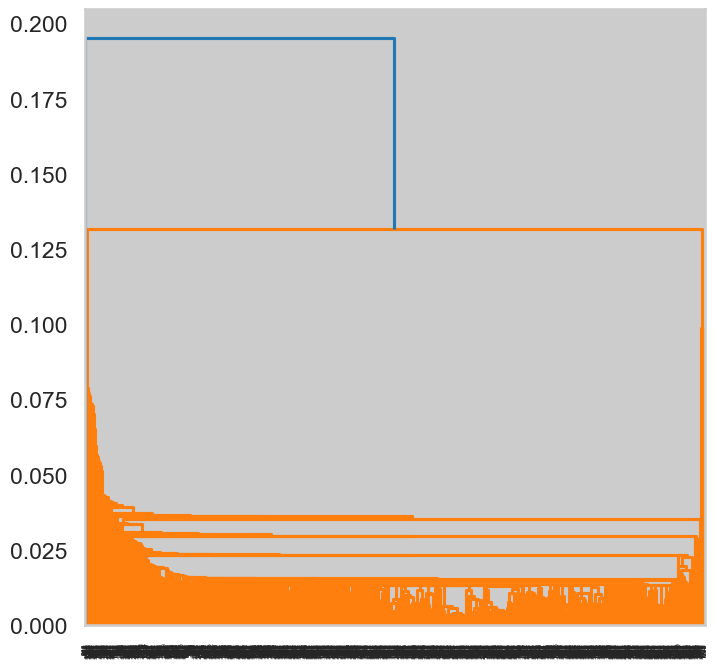

In [56]:
customer_linkage_array = get_linkage_df(customer_scaled)
dendrogram(customer_linkage_array[1])
plt.show()

In [57]:
customer_DBSCAN_labels = get_labels_DBSCAN(0.1 , 3.1 ,5,26, customer_scaled)
customer_silhouette_array = get_silhouette_score(customer_scaled , customer_DBSCAN_labels)
customer_silhouette_scores = np.array(customer_silhouette_array)[:, 0]
customer_index_of_max_score = np.argmax(customer_silhouette_scores)
customer_silhouette_array[customer_index_of_max_score]

[0.6003036854444057, 'eps=0.2 , min_samples=20']

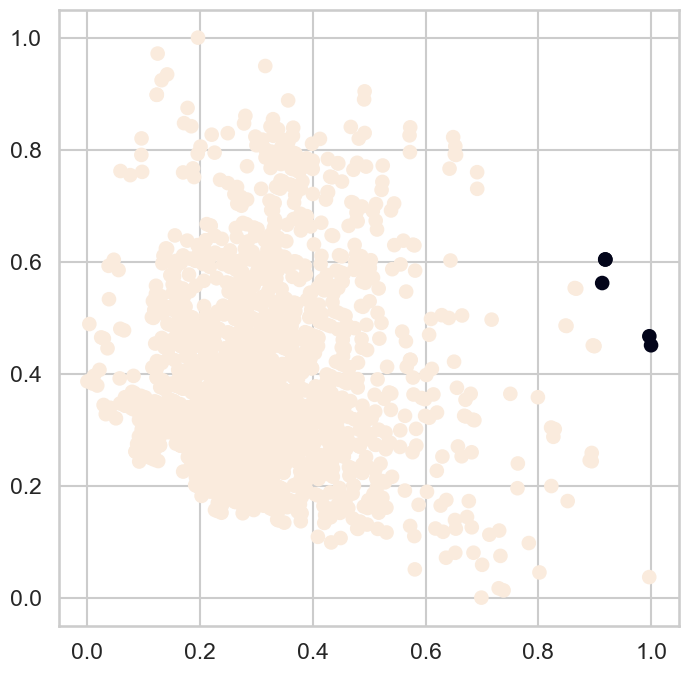

In [58]:
plt.scatter(customer_scaled['col_1'], customer_scaled['col_2'], c= customer_DBSCAN_labels['eps=0.2 , min_samples=20'])


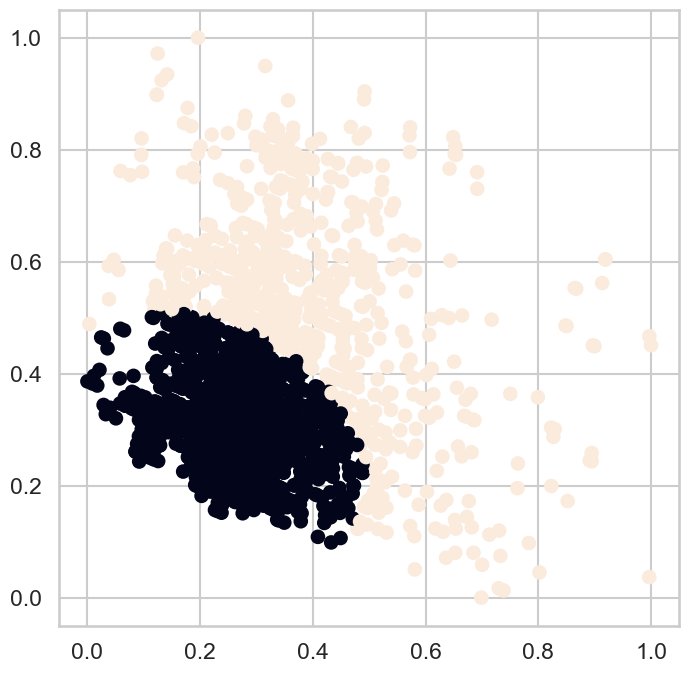

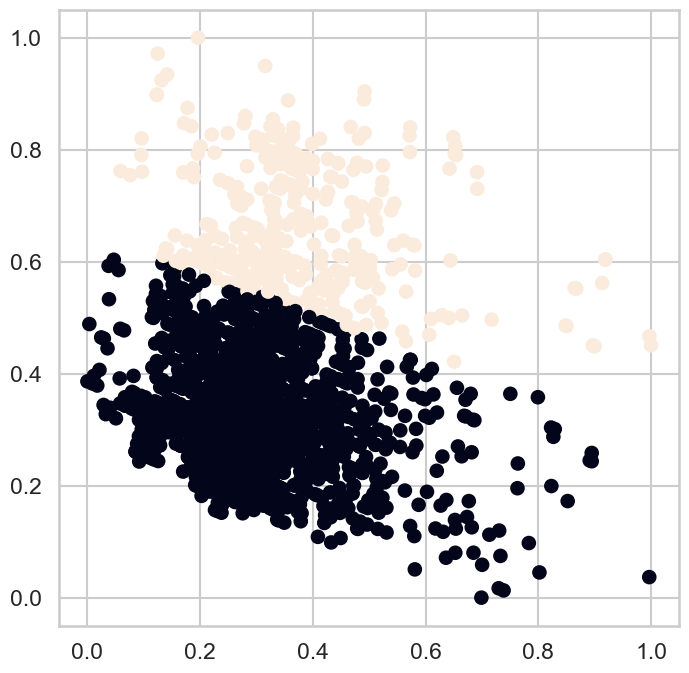

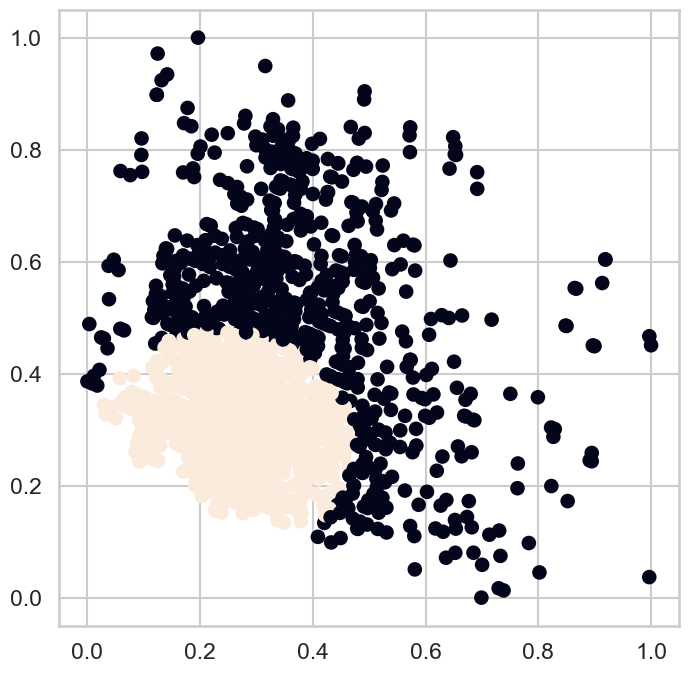

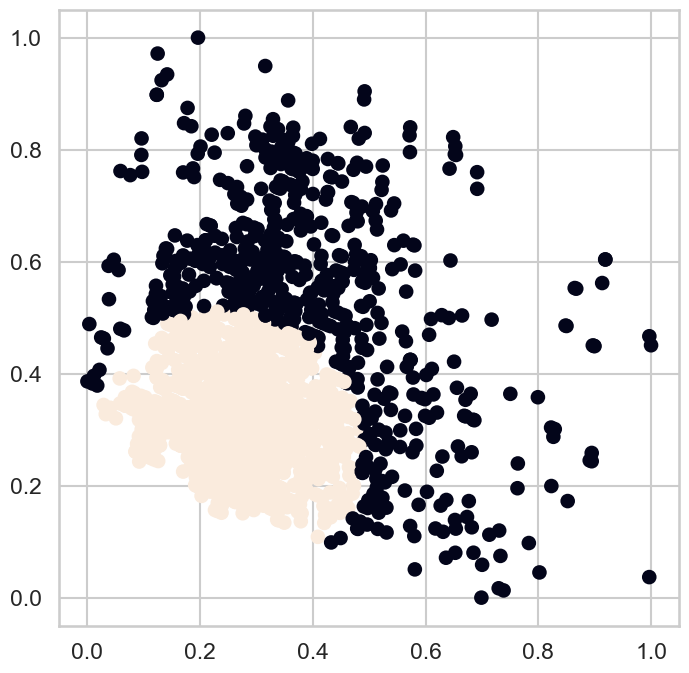

In [59]:
customer_gmm_labels = get_labels_gmm(customer_scaled)

In [60]:
customer_gmm_array = get_silhouette_score(customer_scaled,customer_gmm_labels)
customer_gmm_array

[[0.4030674244656823, 'full'],
 [0.45852326538088933, 'tied'],
 [0.38096670801564086, 'diag'],
 [0.40715033584900984, 'spherical']]

"tied" gives the highest score